In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tweepy

In [4]:
pip install TextBlob

Note: you may need to restart the kernel to use updated packages.


In [6]:
from textblob import TextBlob

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [8]:
from wordcloud import WordCloud

In [9]:
import pandas as pd

In [10]:
import numpy as np

In [11]:
import re

In [12]:
import matplotlib.pyplot as plt

In [13]:
plt.style.use('fivethirtyeight')

In [14]:
import csv

In [15]:
import datetime

In [16]:
#Keys and access for Twitter
consumer_key = "xxx"
consumer_secret = "xxx"
access_token = "xxx"
access_token_secret = "xxx"

In [17]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [18]:
# use API search to save search data to dataframe results

In [19]:
posts=api.user_timeline(screen_name="UBS", lang="en", count=100, tweet_mode="extended")

In [ ]:
# Print data frame if needed but above 5 results it is too big, posts

In [20]:
for tweet in posts[0:5]:        
 print(tweet.full_text + '\n')

What is the path to space tourism? What progress has been made since 2019? Have there been any failed attempts? Listen to our latest podcast for an overview of space tourism and why we think the market is going to increase over the coming years. (10 min) #UBSResearch #shareUBS

We’re one step closer to the opening of @UBSArena. Watch to see the incredible progress that’s been made (hint: our seats are getting installed!). Which concert, event or @NYIslanders game are you most looking forward to seeing at the arena? #shareUBS https://t.co/6dIf2RmNQo

See you in November! https://t.co/UsIF0SBBCE

UBS and @NYIslanders are thrilled to be presenting partners of @43oakfoundation to help support underrepresented student-athletes by providing resources and connections needed to achieve their goals. https://t.co/cCKVIusxdM #HockeyIsForEveryone #shareUBS https://t.co/ZYjg7eyCgy

What if something unexpected happens to me tomorrow? UBS's Carey Shuffman discusses why it's important to have tough m

In [21]:
print("Show results \n")
i=1
for tweet in posts[0:5]:        
 print(str(i)+ ') '+ tweet.full_text + '\n')
 i=i+1

Show results 

1) What is the path to space tourism? What progress has been made since 2019? Have there been any failed attempts? Listen to our latest podcast for an overview of space tourism and why we think the market is going to increase over the coming years. (10 min) #UBSResearch #shareUBS

2) We’re one step closer to the opening of @UBSArena. Watch to see the incredible progress that’s been made (hint: our seats are getting installed!). Which concert, event or @NYIslanders game are you most looking forward to seeing at the arena? #shareUBS https://t.co/6dIf2RmNQo

3) See you in November! https://t.co/UsIF0SBBCE

4) UBS and @NYIslanders are thrilled to be presenting partners of @43oakfoundation to help support underrepresented student-athletes by providing resources and connections needed to achieve their goals. https://t.co/cCKVIusxdM #HockeyIsForEveryone #shareUBS https://t.co/ZYjg7eyCgy

5) What if something unexpected happens to me tomorrow? UBS's Carey Shuffman discusses why 

In [ ]:
# Create column

In [22]:
df= pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [ ]:
# Show the first 5 rows of created column

In [23]:
df.head()

,Tweets
0,What is the path to space tourism? What progre...
1,We’re one step closer to the opening of @UBSAr...
2,See you in November! https://t.co/UsIF0SBBCE
3,UBS and @NYIslanders are thrilled to be presen...
4,What if something unexpected happens to me tom...


In [ ]:
# Clean data

In [24]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'https','',text)
    return text

In [ ]:
# Show clean data

In [25]:
df['Tweets']=df['Tweets'].apply(cleanTxt)

In [26]:
df

,Tweets
0,What is the path to space tourism? What progre...
1,We’re one step closer to the opening of . Watc...
2,See you in November! ://t.co/UsIF0SBBCE
3,UBS and are thrilled to be presenting partner...
4,What if something unexpected happens to me tom...
...,...
95,“I think the Fed may look to explore climate s...
96,"Igor Putra, Asia Autos Analyst, UBS Indonesia ..."
97,"What's more valuable? Since the pandemic, 77% ..."
98,It's easy to tell your friends and loved ones ...


In [ ]:
# Subjctivity function

In [27]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
# Polarity function

In [28]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
# New columns

In [29]:
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)

In [30]:
df['Polarity']=df['Tweets'].apply(getPolarity)

In [31]:
df

,Tweets,Subjectivity,Polarity
0,What is the path to space tourism? What progre...,0.600000,0.000000
1,We’re one step closer to the opening of . Watc...,0.600000,0.366667
2,See you in November! ://t.co/UsIF0SBBCE,0.000000,0.000000
3,UBS and are thrilled to be presenting partner...,0.700000,0.600000
4,What if something unexpected happens to me tom...,0.944444,0.037037
...,...,...,...
95,“I think the Fed may look to explore climate s...,0.391667,0.066667
96,"Igor Putra, Asia Autos Analyst, UBS Indonesia ...",0.000000,0.000000
97,"What's more valuable? Since the pandemic, 77% ...",0.725000,0.475000
98,It's easy to tell your friends and loved ones ...,0.822222,0.522222


In [ ]:
# Create word cloud

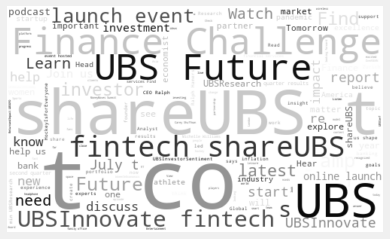

In [32]:
allWords= ' '.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width=500, height=300,random_state=21,max_font_size=110,background_color="white", colormap="binary").generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear" )
plt.axis('off')
plt.show()

In [31]:
# Create word cloud

In [33]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,What is the path to space tourism? What progre...,0.600000,0.000000,Neutral
1,We’re one step closer to the opening of . Watc...,0.600000,0.366667,Positive
2,See you in November! ://t.co/UsIF0SBBCE,0.000000,0.000000,Neutral
3,UBS and are thrilled to be presenting partner...,0.700000,0.600000,Positive
4,What if something unexpected happens to me tom...,0.944444,0.037037,Positive
...,...,...,...,...
95,“I think the Fed may look to explore climate s...,0.391667,0.066667,Positive
96,"Igor Putra, Asia Autos Analyst, UBS Indonesia ...",0.000000,0.000000,Neutral
97,"What's more valuable? Since the pandemic, 77% ...",0.725000,0.475000,Positive
98,It's easy to tell your friends and loved ones ...,0.822222,0.522222,Positive


In [ ]:
# Print positive tweets about UBS

In [34]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) We’re one step closer to the opening of . Watch to see the incredible progress that’s been made (hint: our seats are getting installed!). Which concert, event or  game are you most looking forward to seeing at the arena? shareUBS ://t.co/6dIf2RmNQo

2) UBS and  are thrilled to be presenting partners of  to help support underrepresented student-athletes by providing resources and connections needed to achieve their goals. ://t.co/cCKVIusxdM HockeyIsForEveryone shareUBS ://t.co/ZYjg7eyCgy

3) What if something unexpected happens to me tomorrow? UBS's Carey Shuffman discusses why it's important to have tough money conversations with your partner during 's MoneyMoves Summit. shareUBS ://t.co/WF9dmZNiHk

4) Are you looking for short, insightful, and current podcasts? Try UBS Global Research Pod Hub for podcasts on the topics that matter. Hear from our experts on ESG investing, the economy, 5G, inflation and much more. UBSresearch shareUBS

5) When you build a v

In [35]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) We launched a partnership with  &amp;  dedicated to increasing diversity and accessibility within ice hockey.  Founder Sean Grevy &amp; a few 43OAKFoundation players gathered in Times Square to celebrate. ://t.co/Hr1CY2TvD9 HockeyIsForEveryone shareUBS ://t.co/XPzPQFh5kf



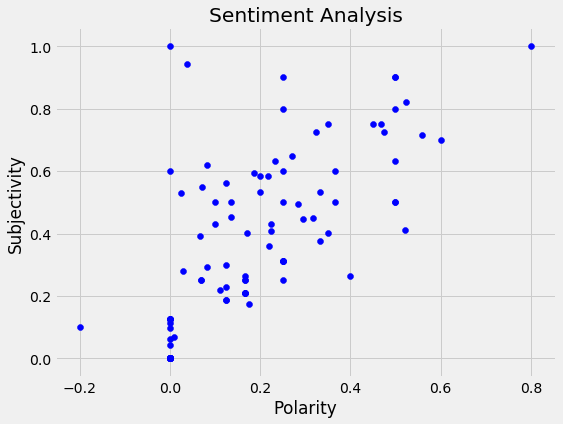

In [36]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [37]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

72.0

In [38]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

1.0

In [39]:
# Show the value counts
df['Analysis'].value_counts()

Positive    72
Neutral     27
Negative     1
Name: Analysis, dtype: int64

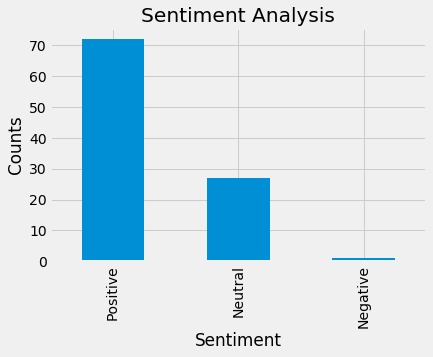

In [40]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()